In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import joblib

In [5]:
file_path = 'AnomaData(Sheet1).csv'
data = pd.read_csv(file_path)

In [6]:
if 'y.1' in data.columns:
    data = data.drop(columns=['y.1'])

In [7]:
data['time'] = pd.to_datetime(data['time'], errors='coerce')

In [8]:
missing_values = data.isnull().sum()
print("Missing Values Per Column:\n", missing_values)

Missing Values Per Column:
 time    0
y       0
x1      0
x2      0
x3      0
       ..
x56     0
x57     0
x58     0
x59     0
x60     0
Length: 61, dtype: int64


In [9]:
data = data.dropna()

In [10]:
print("Dataset Overview:\n", data.head())
print("Statistical Summary:\n", data.describe())

Dataset Overview:
                  time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x50        x51        x52  \
0 -20.669883  0.000732 -0.061114  ...  11.295155  29.984624  10.091721   
1 -18.758079  0.000732 -0.061114  ...  11.290761  29.984624  10.095871   
2 -17.836632  0.010803 -0.061114  ...  11.286366  29.984624  10.100265   
3 -18.517601  0.002075 -0.061114  ...  11.281972  29.984624  10.104660   
4 -17.505913  0.000732 -0.061114  ...  11.277577  29.984624  10.109054   

        x54        x55        x56       x57       x58       x

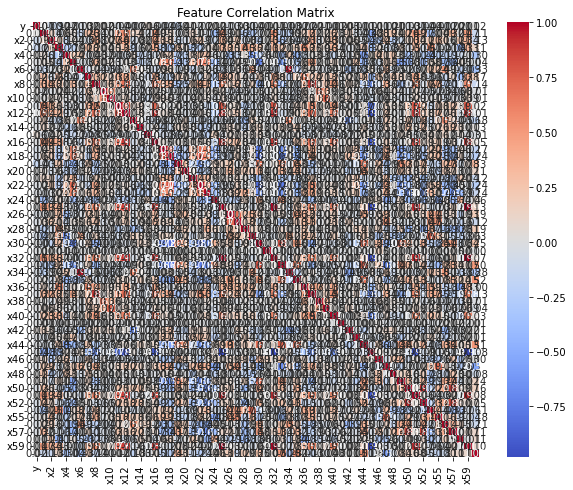

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [12]:
X = data.drop(columns=['y', 'time'])  # Exclude target and time column
y = data['y']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = rf.predict(X_test)

In [17]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3658
           1       0.94      0.68      0.79        22

    accuracy                           1.00      3680
   macro avg       0.97      0.84      0.89      3680
weighted avg       1.00      1.00      1.00      3680

Confusion Matrix:
 [[3657    1]
 [   7   15]]
ROC AUC Score: 0.922890054177643


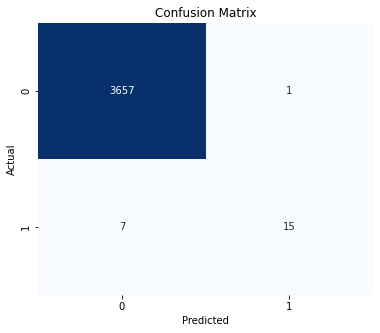

In [18]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [20]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Best Model ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3658
           1       0.93      0.64      0.76        22

    accuracy                           1.00      3680
   macro avg       0.97      0.82      0.88      3680
weighted avg       1.00      1.00      1.00      3680

Best Model Confusion Matrix:
 [[3657    1]
 [   8   14]]
Best Model ROC AUC Score: 0.9405474924201004


In [26]:
joblib.dump(best_model, 'anomadata_rf_model.pkl')
print("Model saved as 'anomadata_rf_model.pkl'.")

Model saved as 'anomadata_rf_model.pkl'.
